<img src="qiskit_logo.png" style="width:30%;height:30%"/>

# Grupo de pesquisa em Aprendizagem de Máquina e Computação Quântica - CIn UFPE (https://github.com/adjs/am-cq)
## Tutorial Qiskit
#### Nicolas Melo de Oliveira (nmo@cin.ufpe.br)

### Qiskit - Quantum Information Software kit para simulação, compilação e execução de programas quânticos

### - Instalação

#### Aconselhável utilizar o Jupyter Notebook
- Programar direto no browser
- Permite inclusão de textos
- Facilita visualização dos resultados

#### Também é aconselhável o uso do Anaconda
- Plataforma para computação científica em Python e R
- Criação de ambientes virtuais específicos
- Permite especificar versão do Python e conjunto de bibliotecas
- Após a instalação: criar novo ambiente, abrir o terminal e pip install qiskit

<img src="anaconda.png" style="width:70%;height:70%"/>

#### Para execução em computadores quânticos da IBM
- https://quantum-computing.ibm.com/
- Criar conta
- Obter API Token

<img src="ibm.png" style="width:35%;height:35%"/>

#### Circuit omposer
- Testar circuitos quânticos simples
- Não é útil para programas grandes
- Gera, automaticamente, um código QASM (Linguagem de baixo nível desenvolvida pela IBM para representar circuitos quânticos)

<img src="composer.png" style="width:60%;height:60%"/>

### - Elementos do Qiskit (funcionalidades presentes e a serem incluídas)

* ### Terra
    - Voltado para o estudo a nível de circuito e pulsos
    - Formalização de backends
    - Provider (fornecer back-end para o usuário executar circuitos quânticos)
    - Busca lidar melhor com a profundidade dos circuitos, tornando eles mais eficientes
    - Objetiva tornar mais fácil a construção de circuitos complexos
    - Possui 6 módulos principais:
        - Circuit: lida com circuitos quânticos, qubits, registradores, portas lógicas e medições
        - Pulse: nível mais baixo que o de circuitos, tratando de pulsos para representar portas lógicas; experimentos podem ser projetados nesse nível para reduzir erros
        - Transpiler: conceito de gerenciador para permitir que usuários explorem a otimização e encontrem melhores circuitos quânticos para um dado algoritmo (para reduzir erros experimentais, por exemplo)
        - Providers: maneira conveniente de lidar com a execução dos circuitos quânticos no backend, passando por 4 partes (provider, backend, job e result)
        - Quantum Information: ferramentas para implementar tarefas simples de informação quântica; inclui métodos para estimar métricas e gerar estados, operações e canais quânticos
        - Visualization: visualização do circuito e histograma

* ### Aer
    - Lida com backends do simulador
    - Possui as implementações dos simuladores (QASM, statevector e unitário)
    - Provê otimização para os simuladores
    - Backends mais eficientes para circuitos específicos
    - Ferramentas de aproximação de ruído
        - Construção de modelos de ruído altamente configuráveis para realizar simulações ruidosas realistas dos erros que ocorrem durante a execução em dispositivos reais

* ### Ignis
    - Para quem deseja estudar o ruído (mitigando ou tirando proveito dele)
    - Destinado àqueles que desejam projetar códigos de correção quântica de erros
    - Conjunto de ferramentas para caracterização de erros
    - Aprimoramento das portas lógicas
    - Aprimoramento da computação na presença de ruído
    - Tomografia de estado quântico
    - Randomização de circuito
    - Mitigação de erro (melhorar resultados de experimentos de química quântica)

* ### Aqua
    - Para desenvolvimento de aplicações para computadores NISQ (Noisy Intermediate-Scale Quantum devices)
    - Biblioteca de algoritmos e aplicações quânticas (Grover, Deutsch-Jozsa, Simon, HHL, estimação de amplitude/fase, kernel quântico SVM e algoritmos para aprendizado supervisionado)
    - Otimizadores, oráculos, Transformada Quântica de Fourier
    - Suporte para Química, Inteligência Artificial, Otimização e Finanças
    - É extensível e permite que os pesquisadores contribuam com suas próprias implementações de novos algoritmos e componentes
    - Melhoramentos de desempenho dos algoritmos quânticos para execução em simuladores e hardware quântico real
    - Suporte para execução em hardware quântico

## Criando circuitos básicos

### - Imports

In [6]:
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor

### - Inicializando registradores e circuito quântico
- $n$ e $m$ são as quantidade de qubits/bits presentes em cada registrador, quântico e clássico, respectivamente

In [3]:
n = 2
m = 2

q = QuantumRegister(n)
c = ClassicalRegister(m)

circuito = QuantumCircuit(q, c)

### - Aplicando portas lógicas
- Portas lógicas recebem o índice do qubit onde serão aplicadas
- Por exemplo, a porta CNOT recebe o índice do qubit de $controle$ e o índice do qubit $alvo$

In [4]:
circuito.h(q[0])
circuito.cx(q[0], q[1])
circuito.swap(q[0],q[1])

### - Realizando medições
- A medição irá ler um qubit do registrador quântico e escrever o resultado obtido em um bit clássico

In [18]:
circuito.measure(q[0], c[0])
circuito.measure(q[1], c[1])

### - Visualizando o ciruito
- Existem algumas alternativas:
    - print(circuito)
    - circuito.draw(output='mpl')
    - circuito.draw(output='latex')
    - circuit_drawer(circuito)

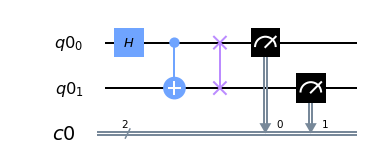

In [19]:
circuito.draw(output='mpl')

### - Visualizando código QASM do circuito

In [20]:
print(circuito.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
swap q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



### - Obtendo a lista de backends disponíveis (para execução em computadores quânticos reais)

In [21]:
IBMQ.update_account()

Found 1 credentials.
No credentials available for updating could be found. No action will be performed.
Warnings:
The stored account with url "https://auth.quantum-computing.ibm.com/api" is already an IBM Q Experience v2 account.


In [22]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backends = provider.backends()
print(backends)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]


### - Obtendo a lista de backends disponíveis (para execução em simuladores)
- qasm_simulator: simulação fiel ao computador quântico real (precisa ter uma medição)
- statevector_simulator: simulação visando obter as amplitudes do estado final
- unitary_simulator: obtenção da matriz unitária correspondente ao circuito (não pode ter medições)

In [23]:
print(BasicAer.backends())

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>, <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>, <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]


### - Execução com o qasm_simulator
- print(contagem) exibe os valores de saída e quantas vezes eles foram obtidos
- A indexação é da direita para a esquerda. Assim, measure(q[0], c[0]) vai salvar o resultado da medição no bit mais a direita

In [25]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=1024)
resultado = job.result()
contagem = resultado.get_counts()
print(contagem)

{'00': 507, '11': 517}


### - Execução com o statevector_simulator

In [26]:
#simulador = BasicAer.get_backend('statevector_simulator')
#job = execute(circuito, simulador)
#resultado = job.result()
#estado = resultado.get_statevector()
#plot_state_city(estado)
#print(estado)

### - Execução com o unitary_simulator

In [27]:
#simulador = BasicAer.get_backend('unitary_simulator')
#job = execute(circuito, simulador)
#resultado = job.result()
#matriz = resultado.get_unitary()
#print(matriz)

### - Exibindo histograma referente ao resultado obtido

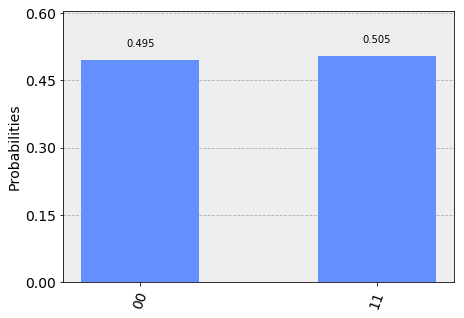

In [28]:
plot_histogram(contagem)

### - Salvando API Token da conta IBM
- Necessário apenas uma única vez

In [30]:
IBMQ.save_account('colar API Token aqui')

### - Obter status do computador quântico

In [34]:
ibmq16 = provider.get_backend('ibmq_16_melbourne')
ibmq16.status()

BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')

### - Obter mapa de conectividade dos qubits

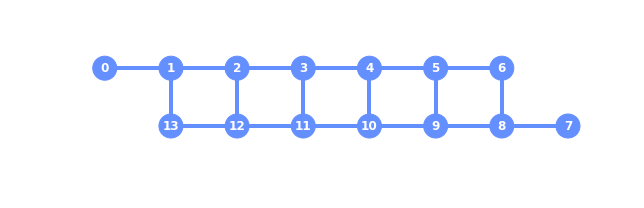

In [35]:
plot_gate_map(ibmq16)

### - Execução direta em computador quântico da IBM
- A requisição de execução entra em uma fila
- Pode demorar muito até a execução ocorrer
- IMPORTANTE - observar na sua conta quantas execuções estão na fila e quais máquinas estão online
- job_monitor(job) mostra a posição do job em tempo real. IMPORTANTE - se a conexão com a internet for interrompida, o job é cancelado

In [ ]:
maquina_ibmqx16 = IBMQ.get_backend('ibmq_16_melbourne')
job = execute(circuito, maquina_ibmqx16, shots=1024)

job_monitor(job)

resultado = job.result()
contagem = resultado.get_counts()
print(contagem)

## Exemplo - Algoritmo de Deutsch-Jozsa

<img src="deutsch.png" style="width:50%;height:50%"/>

### - O algoritmo:
- No problema da Deutsch-Jozsa, recebemos um computador quântico de caixa preta conhecido como $oráculo$ que implementa alguma função $f:\left \{ 0,1 \right \}^{n}\rightarrow \left \{ 0,1 \right \}$
- A função aceita valores binários de n dígitos como entrada e produz 0 ou 1 como saída para cada valor
- Existe uma promessa de que:
    - Se a função for constante, leremos 0 na medição
    - Se a função for balanceada, leremos um valor diferente de 0 na medição

### - Implementação de uma função balanceada:
$f(00)=f(11)=0$

$f(01)=f(10)=1$

-----------------------------------

$00,0\rightarrow00,0$

$00,1\rightarrow00,1$

$01,0\rightarrow01,1$

$01,1\rightarrow01,0$

$10,0\rightarrow10,1$

$10,1\rightarrow10,0$

$11,0\rightarrow11,0$

$11,1\rightarrow11,1$

### - Imports, inicialização dos registradores clássicos e quânticos, inicialização do circuito e aplicação das portas lógicas para preparação do estado onde será aplicado $U_{f}$

In [37]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

q = QuantumRegister(3)
c = ClassicalRegister(2)

circuito = QuantumCircuit(q, c)

circuito.x(q[2])
circuito.barrier()

circuito.h(q[0])
circuito.h(q[1])
circuito.h(q[2])
circuito.barrier()

### - Aplicação de $U_{f}$. Nesse caso, temos 2 opções equivalentes:
- Aplicar uma porta Toffoli ativada por 0 no 1º qubit e por 1 no 2º qubit e aplicar outra porta Toffoli ativada por 1 no 1º qubit e por 0 no 2º qubit
- Aplicar uma porta CNOT com controle no 1º qubit e alvo no 3º qubit e aplicar outra porta CNOT com controle no 2º qubit e alvo no 3º qubit

### - $U_{f} 1$

In [38]:
circuito.x(q[0])
circuito.ccx(q[0],q[1],q[2])
circuito.x(q[0])
circuito.barrier()

circuito.x(q[1])
circuito.ccx(q[0],q[1],q[2])
circuito.x(q[1])
circuito.barrier()

### - $U_{f} 2$

In [39]:
#circuito.cx(q[0],q[2])
#circuito.barrier()

#circuito.cx(q[1],q[2])
#circuito.barrier()

### - Aplicação de Hadamard e medição nos 2 primeiros qubits

In [40]:
circuito.h(q[0])
circuito.h(q[1])
circuito.barrier()

circuito.measure(q[0],c[0])
circuito.measure(q[1],c[1])

### - Visualização do circuito

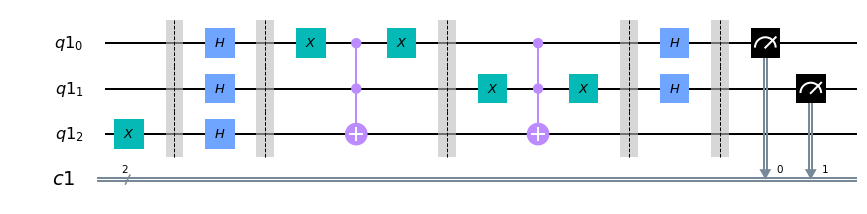

In [41]:
circuito.draw(output='mpl')

### - Simulação

In [42]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=1024)
resultado = job.result()
contagem = resultado.get_counts()

print(contagem)

{'11': 1024}


##### Referências:

* https://qiskit.org/documentation/
* https://github.com/Qiskit/qiskit-iqx-tutorials
* https://qiskit.org/
* https://github.com/QISKit
* https://jupyter.org
* https://www.anaconda.com/distribution/
* https://quantum-computing.ibm.com/
* https://github.com/Qiskit/qiskit-ibmq-provider#updating-to-the-new-ibm-q-experience
* https://nbviewer.jupyter.org/github/Qiskit/qiskit-iqx-tutorials/tree/master/qiskit/